# Concept Drift in a real dataset

INSECTS Dataset - Aplicação Real com Concept Drift


O dataset é originado de um sistema de armadilhas eletrônicas inteligentes que usam sensores ópticos para:

- Detectar em tempo real a passagem de insetos voadores,

- Classificar a espécie do inseto usando aprendizado de máquina,

- Capturar seletivamente apenas espécies de interesse (ex: mosquitos transmissores de doenças ou pragas agrícolas).


![Imagem de uma armadilha eletrônica para insetos](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTFdbomhwDVpnPylE8Jt6j5DW06WcVdUoeoQ&s)


### Desenvolvimento e Contexto

Este sistema foi desenvolvido por um grupo de pesquisa com foco em controle ambiental e agrícola. Ele utiliza sensores físicos, como sensores ópticos ou acústicos, para capturar sinais dos insetos. Com base nesses sinais, o sistema toma decisões em tempo real sobre capturar ou liberar os insetos, contribuindo para a redução do impacto ambiental ao liberar espécies que não são alvos.

Desenvolvido por um grupo de pesquisa no contexto de controle ambiental e agrícola, envolve sensores físicos que captam sinais (possivelmente ópticos ou acústicos). O sistema toma decisões em tempo real sobre capturar ou liberar o inseto, reduz o impacto ambiental ao liberar insetos que não são alvos.

Como o comportamento dos insetos e o ambiente podem variar com o tempo, clima, localidade, ou estação, o sistema precisa lidar com:

- Mudança nos padrões dos dados de entrada (ex: diferentes voos ou espécies ao longo do dia),

- Mudança no conceito de classificação (ex: variação no padrão de uma espécie por estação do ano).

- Este é um caso real em que a detecção de drift de conceito é essencial para manter a acurácia e a eficiência ambiental do sistema ao longo do tempo.

Padrão de comportamento durante o dia de uma espécie de mosquito:

![Imagem de uma armadilha eletrônica para insetos](/home/guilherme/Downloads/drift_vs/graph_insects.png)




O conjunto de dados contém atributos numéricos derivados de sinais ópticos (ex.: intensidade de reflexão, frequência de batimento de asas, tamanho estimado).



O dataset contém 6 classes balanceadas, representando espécies fictícias (mas plausíveis) de insetos voadores:

- Aedes communis (simula um mosquito)

- Bombus terrestis (simula um zangão)

- Culex pipiens (simula outro mosquito)

- Drosophila melanogaster (mosca-da-fruta)

- Ephemera vulgata (efêmera)

- Harmonia axyridis (joaninha)

In [9]:
# Step 1: Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Step 2: Load the dataset
df = pd.read_csv('INSECTS-incremental_balanced_norm.csv')



In [10]:
df["Class"].value_counts()

,count
Class,
0,9503
2,9503
4,9503
3,9503
5,9503
1,9503


In [11]:

# Step 3: Split into features and labels
X = df.drop('Class', axis=1)

y = df['Class']

N=1000

#Step 4: Split into training and test sets
X_train = X.iloc[:N]
y_train = y.iloc[:N]

X_test = X.iloc[N:]
y_test = y.iloc[N:]



In [12]:


y_train.value_counts()

,count
Class,
5,168
0,167
3,167
4,167
2,166
1,165


##  Computando a eficácia do método (usando o treinamento de tamanho N)

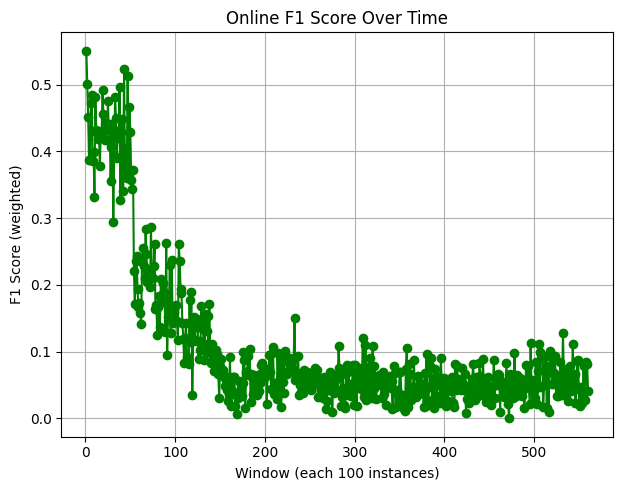

In [13]:
accuracies = []
f1_scores = []
window_size = 100

true_labels = []
predicted_labels = []

# # Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


for i in range(len(X_test)):
    x_i = X_test.iloc[i:i+1]
    y_i = y_test.iloc[i:i+1].values[0]

    pred = rf.predict(x_i)[0]

    true_labels.append(y_i)
    predicted_labels.append(pred)

    # At end of each window, calculate metrics
    if (i + 1) % window_size == 0:

        f1 = f1_score(true_labels, predicted_labels, average='macro')
        #print(i, "f1 score: ", f1)
        f1_scores.append(f1)


        true_labels = []
        predicted_labels = []

        # if i > 10000:
        #     break
# Step 7: Plot accuracy and F1 score
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', color='green')
plt.xlabel(f'Window (each {window_size} instances)')
plt.ylabel('F1 Score (weighted)')
plt.title('Online F1 Score Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


## Retreinar o modelo

In [14]:
# # Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

9999 f1 score:  0.32075449307322207
19999 f1 score:  0.0914679088337375
29999 f1 score:  0.0599069032212455
39999 f1 score:  0.051331660404148154
49999 f1 score:  0.049103547480857025


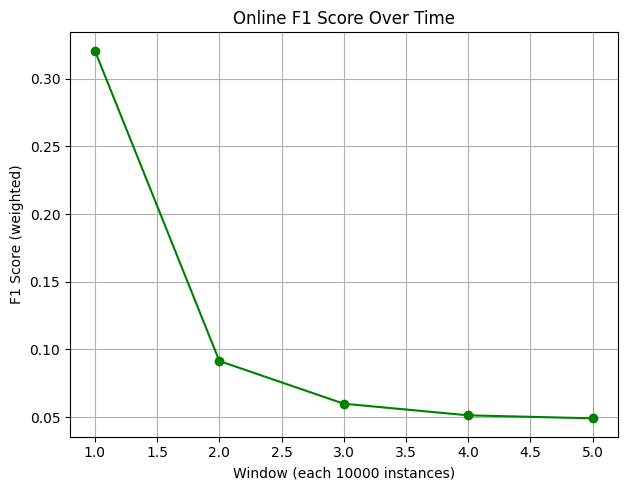

In [16]:
accuracies = []
f1_scores = []
window_size = 10000

true_labels = []
predicted_labels = []

for i in range(len(X_test)):
    x_i = X_test.iloc[i:i+1]
    y_i = y_test.iloc[i:i+1].values[0]

    pred = rf.predict(x_i)[0]

    true_labels.append(y_i)
    predicted_labels.append(pred)

    # At end of each window, calculate metrics
    if (i + 1) % window_size == 0:

        f1 = f1_score(true_labels, predicted_labels, average='macro')

        f1_scores.append(f1)
        print(i, "f1 score: ", f1)

        # if i > 10000:
        #     break
        true_labels = []
        predicted_labels = []

# Step 7: Plot accuracy and F1 score
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o', color='green')
plt.xlabel(f'Window (each {window_size} instances)')
plt.ylabel('F1 Score (weighted)')
plt.title('Online F1 Score Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


# Tarefa


O objetivo desta atividade é evitar que tenha uma queda na qualidade da predição gerando o retreinamento do modelo de tempos em tempos. Para isso, deve-se monitorar a eficiência (f1), se estiver abaixo de um limiar deve-se rodar um retreino do modelo.
